In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from score_reading import load_data_frames
from score_reading import pivot_mean_std
from score_reading import plot_errors
import os
# %matplotlib notebook

## Error plots for DGP sample regression

In [2]:
path = 'scores/greedy*'
greedy = load_data_frames(path)
for metr in ['mse', 'nll']:
    plt.figure()
    plot_errors(greedy[0], metric=metr)
    plot_errors(greedy[1]['50'], metric=metr)
    plot_errors(greedy[2]['50'], metric=metr)
    plt.show()

IndexError: list index out of range

In [3]:
greedy[0].exp.iloc[0]

IndexError: single positional indexer is out-of-bounds

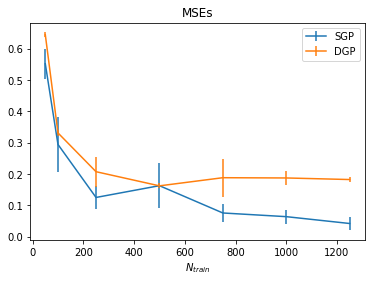

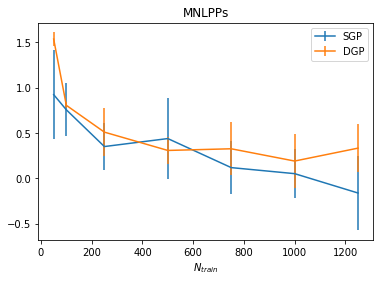

In [4]:
path = 'scores/DGP_*/*'
sample = load_data_frames(path)
M = '50'
for metr in ['mse', 'nll']:
    plt.figure()
#     plot_errors(sample[0], metric=metr)
    plot_errors(sample[1][M], metric=metr)
    plot_errors(sample[2][M], metric=metr)
    plt.show()

In [5]:
path = 'scores/greedy3'
greedy = load_data_frames(path)
for metr in ['mse', 'nll']:
    plot_errors(greedy[0], metric=metr)
    plot_errors(greedy[1]['50'], metric=metr)
    plot_errors(greedy[2]['50'], metric=metr)
    plt.show()

AttributeError: 'DataFrame' object has no attribute 'model'

# short_long init vs baseline

['short_long']


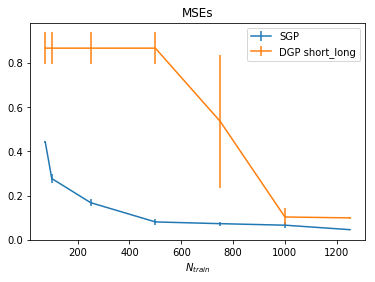

['short_long']


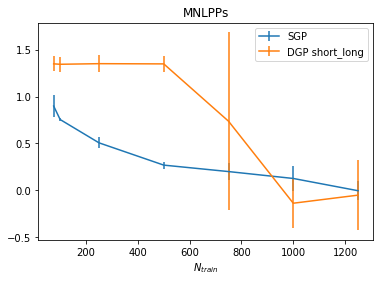

In [6]:
path = 'scores/exp_init/short_long/*'
short_long = load_data_frames(path)
path = 'scores/exp_init/baseline/*'
baseline = load_data_frames(path)
M='40'
for metr in ['mse', 'nll']:
    plt.figure()
    plot_errors(baseline[1][M], metric=metr)
    plot_errors(short_long[2][M], metric=metr,init=True)
    plt.show()

# long_short init vs baseline

['long_short']


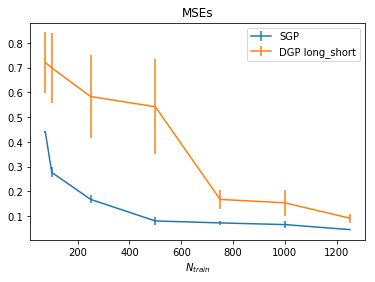

['long_short']


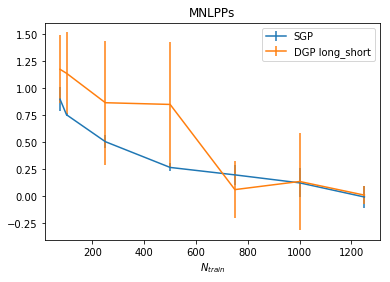

In [7]:
path = 'scores/exp_init/long_short/*'
long_short = load_data_frames(path)
path = 'scores/exp_init/baseline/*'
baseline = load_data_frames(path)
M='40' # or 30, 40, 50
for metr in ['mse', 'nll']:
    plt.figure()
    plot_errors(baseline[1][M], metric=metr)
    plot_errors(long_short[2][M], metric=metr, init=True)
    plt.show()

## Individual Experiment plots

['long_short']
['default']
['short_long']


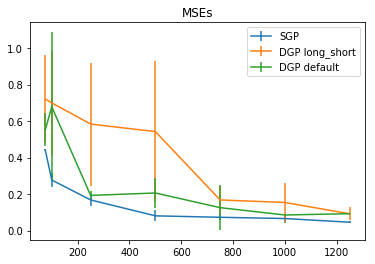

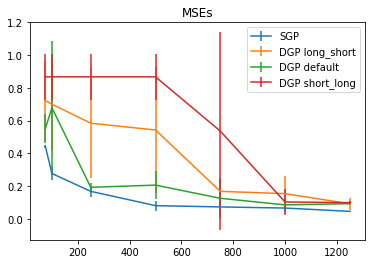

['long_short']
['default']
['short_long']


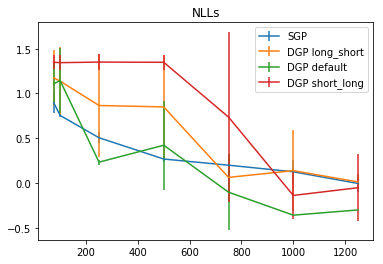

In [12]:
path = 'scores/exp_init/long_short/*'
long_short = load_data_frames(path)
path = 'scores/exp_init/baseline/*'
baseline = load_data_frames(path)
path = 'scores/exp_init/default/*'
default = load_data_frames(path)
path = 'scores/exp_init/short_long/*'
short_long = load_data_frames(path)
M='40' # or 30, 40, 50
for metr in ['mse', 'nll']:
    plt.figure()
    plot_errors(baseline[1][M], metric=metr)
    plot_errors(long_short[2][M], metric=metr, init=True)
    plot_errors(default[2][M], metric=metr, init=True)
    plot_errors(short_long[2][M], metric=metr, init=True)
    plt.show()

In [9]:
def load_data_frames(search_path):
    os.system('ls '+search_path+'.csv > temp')
    df_tot = pd.DataFrame()
    with open('temp') as df_tot_list: 
        for df_tot_name in df_tot_list:
            df_tot_new = pd.read_csv(df_tot_name.strip(), header=0, index_col=0)
            df_tot_new['exp'] = df_tot_name.strip('.csv\n').strip('scores/') + df_tot_new['exp'].astype('str')
#             df_tot_new['exp'] = df_tot_name.strip('.csv\n').strip('scores/')
            df_tot = pd.concat((df_tot,df_tot_new), axis=0)
    GPs, SGPs, DGPs = df_tot[df_tot.model == 'GP'], df_tot[df_tot.model== 'SGP'], df_tot[df_tot.model == 'DGP']
    SGP_dict, DGP_dict = {}, {}
    for m in list(set(SGPs.M)):
        SGP_dict[str(int(m))] = SGPs[SGPs.M == m]
    for m in list(set(DGPs.M)):
        DGP_dict[str(int(m))] = DGPs[DGPs.M == m]
    os.system('rm temp')
    return GPs, SGP_dict, DGP_dict

def pivot_mean_std(df): 
    df_error = pd.DataFrame()
    df = df.drop_duplicates(subset=['N_train','exp'])
    df_error['mse_mean'] = df.pivot(index='N_train', columns='exp',values='mse').mean(axis=1)
    df_error['mse_std'] = df.pivot(index='N_train', columns='exp',values='mse').std(axis=1)
    df_error['nll_mean'] = df.pivot(index='N_train', columns='exp',values='nll').mean(axis=1)
    df_error['nll_std'] = df.pivot(index='N_train', columns='exp',values='nll').std(axis=1)
    return df_error

def plot_errors(df, metric='mse', init=False): 
    avgs = pivot_mean_std(df)
    model = list(set(df.model))[0]
    if (model == 'DGP')&(init): 
        print list(set(df.init))
        label = model +' '+ str(list(set(df.init))[0])
    else: 
        label = model
    x, y, std = avgs.index.values, avgs[metric+'_mean'], avgs[metric+'_std']
    plt.errorbar(x, y,yerr=std,label=label)
    plt.legend()
    plt.title(metric.upper()+'s')

In [10]:
baseline_3 = baseline[baseline['exp'] == 'exp_3']
default_3 = default[default['exp'] == 'exp_3']
short_long_3 = short_long[short_long['exp'] == 'exp_3']
long_short_3 = long_short[long_short['exp'] == 'exp_3']

baseline_SGP = baseline_3[baseline_3['model'] == 'SGP']

baseline_SGP_30 = baseline_SGP[baseline_SGP['M'] == 30]
baseline_SGP_40 = baseline_SGP[baseline_SGP['M'] == 40]
baseline_SGP_50 = baseline_SGP[baseline_SGP['M'] == 50]

default_30 = default_3[default_3['M'] == 30]
default_40 = default_3[default_3['M'] == 40]
default_50 = default_3[default_3['M'] == 50]

short_long_30 = short_long_3[short_long_3['M'] == 30]
short_long_40 = short_long_3[short_long_3['M'] == 40]
short_long_50 = short_long_3[short_long_3['M'] == 50]

long_short_30 = long_short_3[long_short_3['M'] == 30]
long_short_40 = long_short_3[long_short_3['M'] == 40]
long_short_50 = long_short_3[long_short_3['M'] == 50]

plt.figure()
plt.plot(baseline_SGP_30['N_train'],baseline_SGP_30['mse'], '-g',label='basline')
plt.plot(default_30['N_train'],default_30['mse'], '-r',label='default')
plt.plot(short_long_30['N_train'],short_long_30['mse'], '--r',label='short_long')
plt.plot(long_short_30['N_train'],long_short_30['mse'], '--b',label='long_short')
plt.legend()
plt.title('MSEs M=30')
plt.show()

plt.figure()
plt.plot(baseline_SGP_30['N_train'],baseline_SGP_30['nll'], '-g',label='basline')
plt.plot(default_30['N_train'],default_30['nll'], '-r',label='default')
plt.plot(short_long_30['N_train'],short_long_30['nll'], '--r',label='short_long')
plt.plot(long_short_30['N_train'],long_short_30['nll'], '--b',label='long_short')

plt.legend()
plt.title('NLLs M=30')
plt.show()

plt.figure()
plt.plot(baseline_SGP_40['N_train'],baseline_SGP_40['mse'], '-g',label='basline')
plt.plot(default_40['N_train'],default_40['mse'], '-r',label='default')
plt.plot(short_long_40['N_train'],short_long_40['mse'], '--r',label='short_long')
plt.plot(long_short_40['N_train'],long_short_40['mse'], '--b',label='long_short')
plt.legend()
plt.title('MSEs M=40')
plt.show()

plt.figure()
plt.plot(baseline_SGP_40['N_train'],baseline_SGP_40['nll'], '-g',label='basline')
plt.plot(default_40['N_train'],default_40['nll'], '-r',label='default')
plt.plot(short_long_40['N_train'],short_long_40['nll'], '--r',label='short_long')
plt.plot(long_short_40['N_train'],long_short_40['nll'], '--b',label='long_short')

plt.legend()
plt.title('NLLs M=40')
plt.show()

plt.figure()
plt.plot(baseline_SGP_50['N_train'],baseline_SGP_50['mse'], '-g',label='basline')
plt.plot(default_50['N_train'],default_50['mse'], '-r',label='default')
plt.plot(short_long_50['N_train'],short_long_50['mse'], '--r',label='short_long')
plt.plot(long_short_50['N_train'],long_short_50['mse'], '--b',label='long_short')
plt.legend()
plt.title('MSEs M=50')
plt.show()

plt.figure()
plt.plot(baseline_SGP_50['N_train'],baseline_SGP_50['nll'], '-g',label='basline')
plt.plot(default_50['N_train'],default_50['nll'], '-r',label='default')
plt.plot(short_long_50['N_train'],short_long_50['nll'], '--r',label='short_long')
plt.plot(long_short_50['N_train'],long_short_50['nll'], '--b',label='long_short')

plt.legend()
plt.title('NLLs M=50')
plt.show()

TypeError: tuple indices must be integers, not str